In [1]:
import pandas as pd

import matplotlib.pyplot as plt

df = pd.read_csv(
    r"C:\Users\Faraz-Store\Downloads\stores_sales_forecasting.csv",
    encoding="latin1"
)



In [2]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"]  = pd.to_datetime(df["Ship Date"])
df.head()
df.tail()
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   datetime64[ns]
 4   Ship Mode      2121 non-null   object        
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   object        
 15  Sub-Category   2121 n

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,2121.000000,2121,2121,2121,2121,2121,2121,2121,2121,2121,...,2121.000000,2121,2121,2121,2121,2121,2121.000000,2121.000000,2121.000000,2121.000000
unique,NaN,1764,NaN,NaN,4,707,707,3,1,371,...,NaN,4,375,1,4,380,NaN,NaN,NaN,NaN
top,NaN,CA-2014-145387,NaN,NaN,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,...,NaN,West,FUR-FU-10004270,Furniture,Furnishings,KI Adjustable-Height Table,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,1248,15,15,1113,2121,192,...,NaN,707,16,2121,957,18,NaN,NaN,NaN,NaN
mean,5041.643564,NaN,2016-04-30 03:54:13.748231680,2016-05-04 01:54:44.299858432,NaN,NaN,NaN,NaN,NaN,NaN,...,55726.556341,NaN,NaN,NaN,NaN,NaN,349.834887,3.785007,0.173923,8.699327
min,1.000000,NaN,2014-01-06 00:00:00,2014-01-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,NaN,2015-05-26 00:00:00,2015-05-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,22801.000000,NaN,NaN,NaN,NaN,NaN,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,NaN,2016-06-20 00:00:00,2016-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,60505.000000,NaN,NaN,NaN,NaN,NaN,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,NaN,2017-05-14 00:00:00,2017-05-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,90032.000000,NaN,NaN,NaN,NaN,NaN,435.168000,5.000000,0.300000,33.726600
max,9991.000000,NaN,2017-12-30 00:00:00,2018-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,99301.000000,NaN,NaN,NaN,NaN,NaN,4416.174000,14.000000,0.700000,1013.127000


In [3]:
df.isna().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [4]:
df = df.drop(columns=[
    "Row ID",
    "Order ID",
    "Customer Name",
    "Product Name",
    "Postal Code"
])


In [5]:
df = df[df["Sales"] > 0]
df = df[df["Quantity"] > 0]
df["Discount"].describe()



count    2121.000000
mean        0.173923
std         0.181547
min         0.000000
25%         0.000000
50%         0.200000
75%         0.300000
max         0.700000
Name: Discount, dtype: float64

In [6]:
df = df.set_index("Order Date")
df = df.sort_index()
df.index.to_series().diff().value_counts().head()


Order Date
0 days    1232
1 days     564
2 days     177
3 days      97
4 days      30
Name: count, dtype: int64

In [7]:
monthly_sales = df["Sales"].resample("ME").sum()


<Axes: title={'center': 'Monthly Sales'}, xlabel='Order Date'>

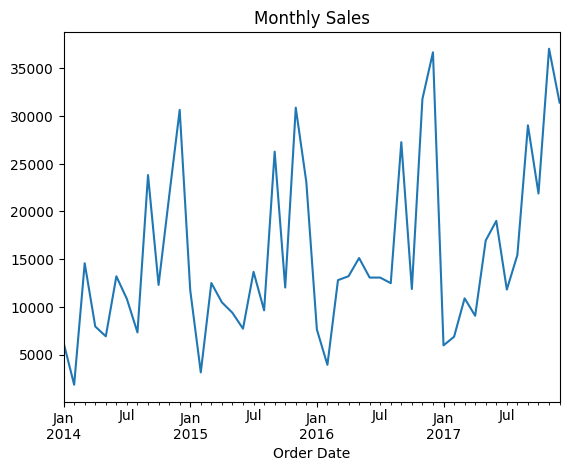

In [8]:
monthly_sales.head()
monthly_sales.tail()
monthly_sales.plot(title="Monthly Sales")


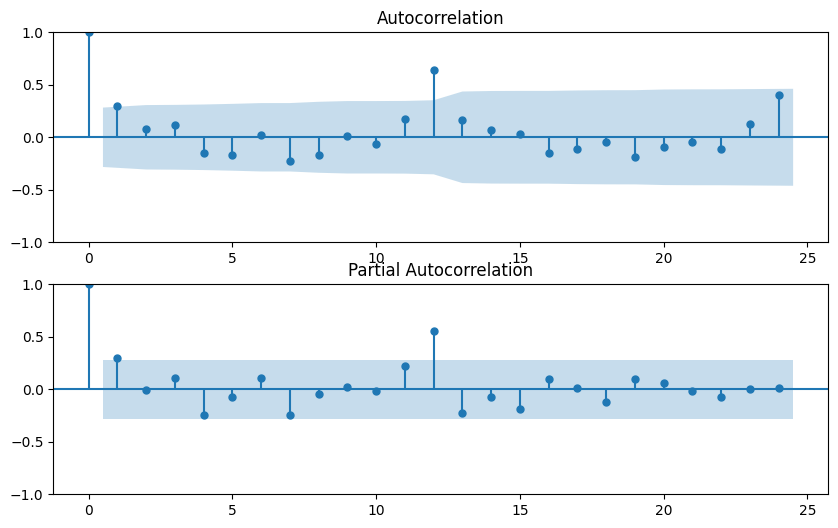

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(10,6))

plot_acf(monthly_sales, lags=24, ax=ax[0])
plot_pacf(monthly_sales, lags= 24, ax=ax[1])

plt.show()


In [10]:
y = monthly_sales.copy()
y = y.asfreq("ME")   # فرکانس ماهانه (Month End)


In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(
    y,
    order=(1, 1, 0),          # (p, d, q)
    seasonal_order=(1, 1, 0, 12),  # (P, D, Q, s)
    enforce_stationarity=False,
    enforce_invertibility=False
)


In [12]:
results = model.fit()
print(results.summary())


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -219.080
Date:                            Sat, 03 Jan 2026   AIC                            444.159
Time:                                    18:09:21   BIC                            447.432
Sample:                                01-31-2014   HQIC                           444.930
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4491      0.398     -1.129      0.259      -1.229       0.330
ar.S.L12      -0.4394      0.271   

In [13]:
train = y.loc[:'2016-12-31']
test  = y.loc['2017-01-31':]

print(len(train), len(test))


36 12


In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(
    train,
    order=(1, 1, 0),
    seasonal_order=(1, 1, 0, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = model.fit()


In [15]:
forecast = results.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()


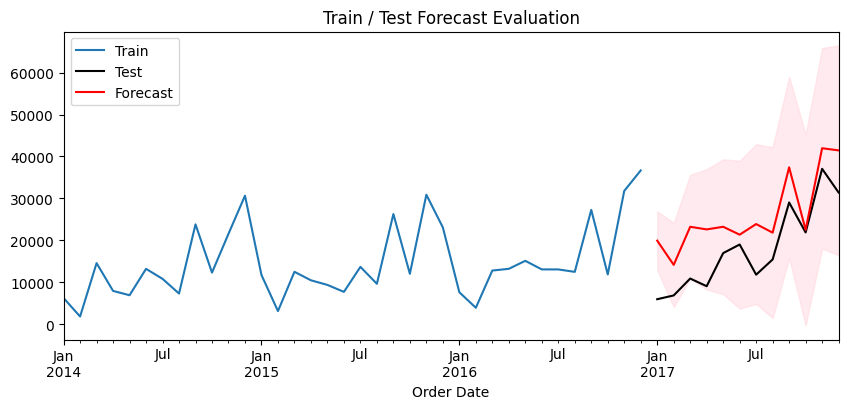

In [16]:
import matplotlib.pyplot as plt

ax = train.plot(label="Train", figsize=(10,4))
test.plot(ax=ax, label="Test", color="black")
forecast_mean.plot(ax=ax, label="Forecast", color="red")

ax.fill_between(
    forecast_ci.index,
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    color="pink",
    alpha=0.3
)

ax.legend()
plt.title("Train / Test Forecast Evaluation")
plt.show()


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae  = mean_absolute_error(test, forecast_mean)
rmse = np.sqrt(mean_squared_error(test, forecast_mean))
mape = np.mean(np.abs((test - forecast_mean) / test)) * 100

mae, rmse, mape


(8181.020257181811,
 np.float64(9178.92917873553),
 np.float64(72.73658452199993))

In [18]:
train = monthly_sales[:'2016-12-31']
test  = monthly_sales['2017-01-31':]

baseline_forecast = monthly_sales.shift(12)
baseline_test = baseline_forecast.loc[test.index]
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae_b  = mean_absolute_error(test, baseline_test)
rmse_b = np.sqrt(mean_squared_error(test, baseline_test))
mape_b = np.mean(np.abs((test - baseline_test) / test)) * 100

mae_b, rmse_b, mape_b


(3747.025316666666,
 np.float64(4473.384041398216),
 np.float64(24.04933179865011))

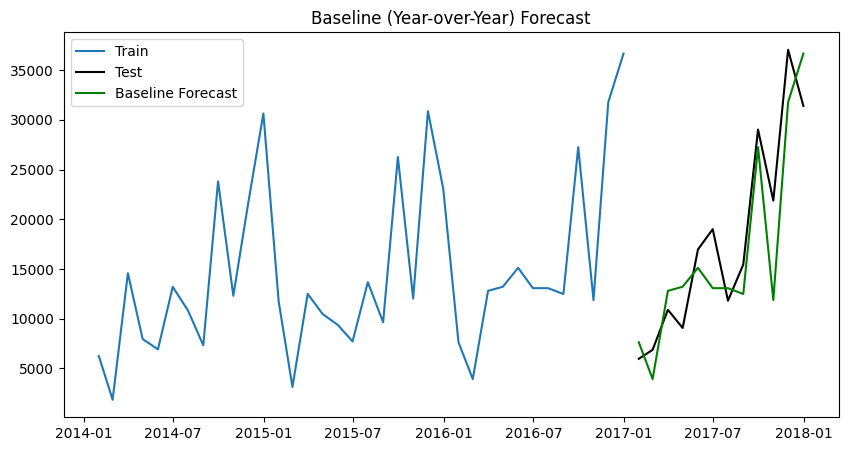

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(train, label="Train")
plt.plot(test, label="Test", color="black")
plt.plot(baseline_test, label="Baseline Forecast", color="green")
plt.legend()
plt.title("Baseline (Year-over-Year) Forecast")
plt.show()


#
A year-over-year baseline outperformed the SARIMA model by a large margin, 
indicating that sales dynamics are primarily driven by strong annual seasonality. 
More complex time series models did not provide additional predictive value given the current data.

In [20]:
import numpy as np

log_monthly_sales = np.log(monthly_sales)

train_log = log_monthly_sales[:'2016-12-31']
test_log  = log_monthly_sales['2017-01-31':]


In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

log_model = SARIMAX(
    train_log,
    order=(1,1,0),
    seasonal_order=(1,1,0,12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

log_results = log_model.fit()


In [22]:
forecast_log = log_results.get_forecast(steps=len(test_log)).predicted_mean
forecast_exp = np.exp(forecast_log)


In [23]:
mae_l  = mean_absolute_error(test, forecast_exp)
rmse_l = np.sqrt(mean_squared_error(test, forecast_exp))
mape_l = np.mean(np.abs((test - forecast_exp) / test)) * 100

mae_l, rmse_l, mape_l


(5635.107057856653,
 np.float64(6630.996196338008),
 np.float64(38.61888411042839))

Multiple forecasting approaches including SARIMA and log-transformed SARIMA were evaluated.

Despite improvements after variance stabilization, a simple year-over-year baseline consistently outperformed all statistical models, indicating that sales dynamics are primarily driven by strong annual seasonality.

Further modeling without additional explanatory features is unlikely to provide meaningful gains


The Year-over-Year baseline outperforms both SARIMA and Log-SARIMA across all error metrics.

Log transformation significantly improves SARIMA performance but remains inferior to the baseline.

Results indicate that annual seasonality dominates sales behavior, and additional model complexity does not yield better forecasts without exogenous features.

In [24]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["SARIMA", "Log-SARIMA", "Baseline (Year-over-Year)"],
    "MAE": [8181, 5635, 3747],
    "RMSE": [9179, 6631, 4473],
    "MAPE (%)": [72.7, 38.6, 24.0]
})

results.style \
    .format({
        "MAE": "{:.0f}",
        "RMSE": "{:.0f}",
        "MAPE (%)": "{:.1f}"
    }) \
    .highlight_min(subset=["MAE", "RMSE", "MAPE (%)"], color="lightgreen") \
    .set_caption("Model Performance Comparison")


,Model,MAE,RMSE,MAPE (%)
0,SARIMA,8181,9179,72.7
1,Log-SARIMA,5635,6631,38.6
2,Baseline (Year-over-Year),3747,4473,24.0
